In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [81]:
df1=df.copy()

In [82]:
df1.Urban.replace(('No','Yes'),(0,1),inplace=True)

In [83]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,Yes
1,11.22,111,48,16,260,83,Good,65,10,1,Yes
2,10.06,113,35,10,269,80,Medium,59,12,1,Yes
3,7.40,117,100,4,466,97,Medium,55,14,1,Yes
4,4.15,141,64,3,340,128,Bad,38,13,1,No


In [84]:
df1.US.replace(('No','Yes'),(0,1),inplace=True)

In [85]:
df1.ShelveLoc.replace(('Bad','Medium','Good'),(0,1,2),inplace=True)

In [86]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [87]:
X=df1.drop(['Sales'],axis=True)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [88]:
y=df1['Sales']
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [90]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

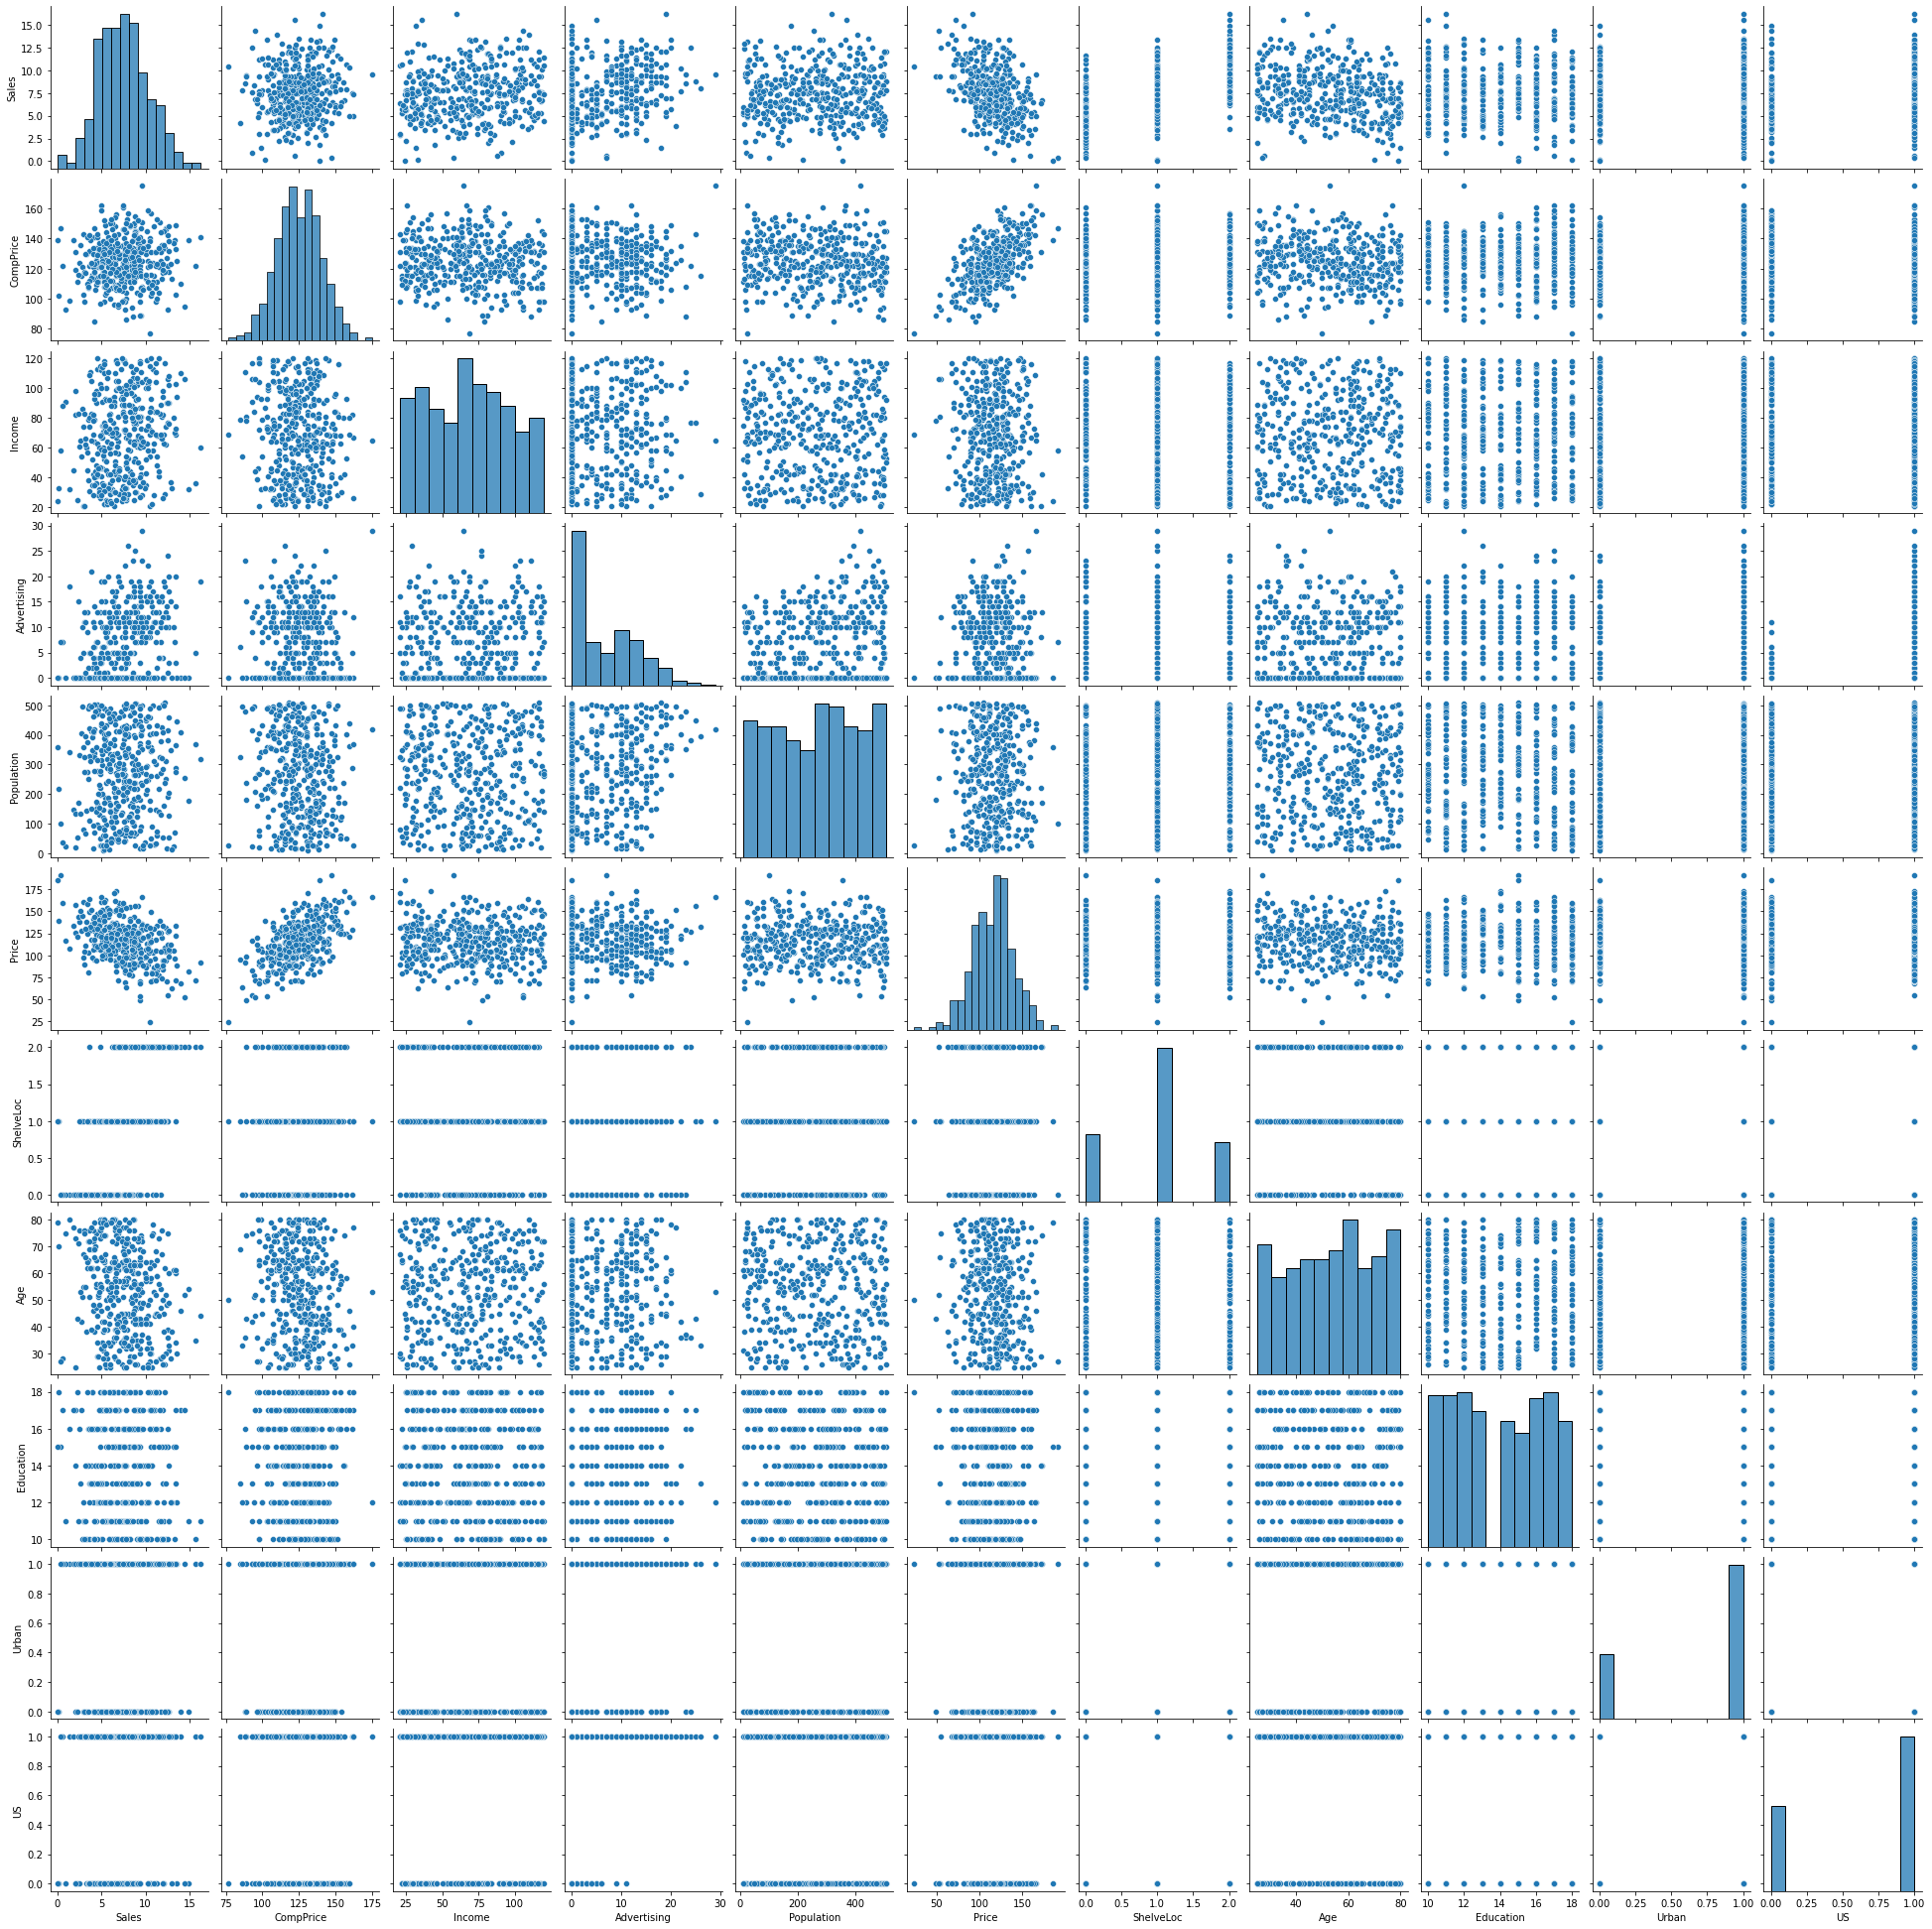

In [91]:
import seaborn as sns
sns.pairplot(df1)

In [92]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_train,y_train)
clf

DecisionTreeRegressor()

In [93]:
clf.score(X_test,y_test)

0.39739524515482916

In [94]:
X_train.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,125.053125,67.993750,6.471875,264.478125,116.012500,0.981250,52.809375,13.912500,0.703125,0.631250
std,15.744442,27.751019,6.686379,144.162372,24.588905,0.685468,16.240297,2.627054,0.457597,0.483222
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,115.000000,42.000000,0.000000,144.000000,100.750000,1.000000,39.000000,12.000000,0.000000,0.000000
50%,124.500000,69.000000,5.000000,270.500000,118.500000,1.000000,53.500000,14.000000,1.000000,1.000000
75%,136.000000,90.000000,11.250000,389.250000,131.250000,1.000000,65.000000,16.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [95]:
y_train.describe()

count    320.000000
mean       7.513063
std        2.867710
min        0.000000
25%        5.495000
50%        7.495000
75%        9.312500
max       16.270000
Name: Sales, dtype: float64

In [96]:
y_train.mean()

7.5130625000000055

In [97]:
y_train.head()

108     3.47
196     4.10
255     7.71
30     13.55
52      7.91
Name: Sales, dtype: float64

In [98]:
df1.loc[df1['Sales']<y_train.mean(),'Sales']=1

In [99]:
df1.loc[df1['Sales']>y_train.mean(),'Sales']=0

In [100]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.0,138,73,11,276,120,0,42,17,1,1
1,0.0,111,48,16,260,83,2,65,10,1,1
2,0.0,113,35,10,269,80,1,59,12,1,1
3,1.0,117,100,4,466,97,1,55,14,1,1
4,1.0,141,64,3,340,128,0,38,13,1,0


In [101]:
y=df1['Sales']
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    0.0
Name: Sales, Length: 400, dtype: float64

In [102]:
X=df1.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [103]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
df1['Sales']=labelencoder.fit_transform(df1['Sales'])


In [104]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,2,65,10,1,1
2,0,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [105]:
x=df1.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [106]:
Y=df1.iloc[:,:1]
Y

,Sales
0,0
1,0
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [108]:
model_gini.fit(x_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [109]:
pred=model_gini.predict(x_test)

In [110]:
pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [111]:
model_gini.score(x_test,Y_test)

0.6875

In [112]:
#Feature Selection 

In [113]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [114]:
array=df1.values
X=array[:,1:]
Y=array[:,:1]

In [115]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [116]:
Y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [117]:
#feature extraction
test=SelectKBest(score_func=chi2,k=3)
fit=test.fit(X,Y)

#summarize scores
set_printoptions(precision=2)
print(fit.scores_)
features=fit.transform(X)

[7.06e-01 7.76e+01 1.76e+02 1.83e+02 2.89e+02 3.05e+01 6.61e+01 2.13e-01
 2.99e-01 3.17e+00]


# Bagging 


In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
array=df1.values
X=array[:,1:]
Y=array[:,:1]

kfold=KFold(n_splits=10,random_state=7)
cart=DecisionTreeClassifier()
num_trees=85

model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)

results=cross_val_score(model,X,Y,cv=kfold)

x=results.mean()
x

0.805

In [120]:
#AdaBoosting

In [121]:
from sklearn.ensemble import AdaBoostClassifier

X=array[:,1:]
Y=array[:,:1]


kfold=KFold(n_splits=20,random_state=7)

model=AdaBoostClassifier(n_estimators=20,random_state=7)

results=cross_val_score(model,X,Y,cv=kfold)

results.mean()

0.835

In [122]:
#Stacking Ensemble

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X=array[:,1:]
Y=array[:,:1]


kfold=KFold(n_splits=10,random_state=7)

#create the sub models
estimators=[]

model1=LogisticRegression(max_iter=160)
estimators.append(('logistic',model1))

model2=DecisionTreeClassifier(max_depth=10)
estimators.append(('cart',model2))

#model4=DecisionTreeRegressor(max_depth=10)
#estimators.append((model4))

model3=SVC()
estimators.append(('svm',model3))

ensemble=VotingClassifier(estimators)

results=cross_val_score(ensemble,X,Y,cv=kfold)

results.mean()

0.8375